# Import libraries

In [32]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

Insert Dataset

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [11]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Features and depedent variable

In [6]:
x = df.iloc[:, 3:13]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y = df.iloc[:, 13]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

Conversion of categorical variable using get_dummies

In [8]:
geography = pd.get_dummies(x['Geography'], drop_first = True)
gender = pd.get_dummies(x['Gender'], drop_first=True)

In [9]:
x = pd.concat([x, geography, gender], axis=1)

In [10]:
x = x.drop(columns=['Geography', 'Gender'])
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


Convertion of Data into Train and Test Data

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Feature Scalling

In [13]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [14]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

Deep Learning adding Layeres

In [15]:
#empty layer
classifier = Sequential()

In [19]:
#INput Layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

#Layer 2
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

#Layer 3
# classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

#Output layer sigmmoid as binary classifier and unit 1  - neuron 1 enough
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid' ))


Training the Deep Learning

In [25]:
classifier.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])
model_history = classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 3s 3ms/step - loss: 0.5477 - accuracy: 0.7876 - val_loss: 0.5217 - val_accuracy: 0.7948
Epoch 2/100
536/536 [==============================] - 1s 3ms/step - loss: 0.5136 - accuracy: 0.7960 - val_loss: 0.5062 - val_accuracy: 0.7959
Epoch 3/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4997 - accuracy: 0.7955 - val_loss: 0.4971 - val_accuracy: 0.7952
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4903 - accuracy: 0.7990 - val_loss: 0.4918 - val_accuracy: 0.7944
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4842 - accuracy: 0.7990 - val_loss: 0.4873 - val_accuracy: 0.7970
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4787 - accuracy: 0.8007 - val_loss: 0.4842 - val_accuracy: 0.7963
Epoch 7/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4744 - accuracy: 0.8013 - val_loss: 0.4800 - val_accuracy: 0.8008

In [27]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [30]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 6)                 42        
                                                                 
 dense_6 (Dense)             (None, 6)                 42        
                                                                 
 dense_7 (Dense)             (None, 1)                 7

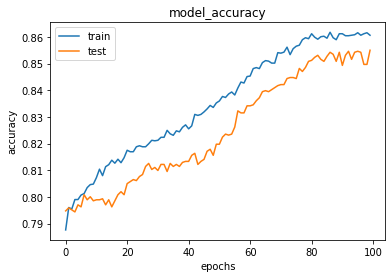

In [36]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

Testing the Model

In [42]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred>0.5)

In [43]:
confusion_matrix(y_test, y_pred)

array([[1501,   94],
       [ 196,  209]])

In [44]:
accuracy_score(y_test, y_pred)

0.855